# Keşifsel Veri Analizi

## Veri Temizleme

Bu ödevde ABD Eğitim Sistemi'ne ait bir takım verileri inceleyeceksiniz. Öncelikle veri kümesini Kaggle'dan indirin. Burada eğitim sistemine ait bir çok veri kümesi bulunmaktadır. Bu ödevde 'states_all.csv' isimli veri kümesini kullanacaksınız.
Veri seti: https://www.kaggle.com/noriuk/us-education-datasets-unification-project/home

### Q1
Veri kümesinde yer alan değişkenlerinin tiplerini ve her bir değişkenin eksik (null) değer oranını bulun.

In [19]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt

warnings.filterwarnings('ignore')

df = pd.read_csv('states_all.csv')

dfbackup = df.copy()


print('\nHer bir degiskenin tipi:')
print('=======================================')
df.info()

print('\nHer bir degiskenin null deger oranlari  (%):')
print('=======================================')

# null degerleri isnull() metodu ile True/False olarak listeleyebilirim
# deger null oldugunda True doneceginden, isnull() metodundan donen nesneye 
# mean() metodunu uyguladigimizda null degerlerin ortlamasini verecektir.
df.isnull().mean()*100


Her bir degiskenin tipi:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1918 entries, 0 to 1917
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   PRIMARY_KEY                   1918 non-null   object 
 1   STATE                         1918 non-null   object 
 2   YEAR                          1918 non-null   int64  
 3   ENROLL                        1224 non-null   float64
 4   TOTAL_REVENUE                 1275 non-null   float64
 5   FEDERAL_REVENUE               1275 non-null   float64
 6   STATE_REVENUE                 1275 non-null   float64
 7   LOCAL_REVENUE                 1275 non-null   float64
 8   TOTAL_EXPENDITURE             1275 non-null   float64
 9   INSTRUCTION_EXPENDITURE       1275 non-null   float64
 10  SUPPORT_SERVICES_EXPENDITURE  1275 non-null   float64
 11  OTHER_EXPENDITURE             1224 non-null   float64
 12  CAPITAL_OUTLAY_EXPENDITURE    1275 n

PRIMARY_KEY                      0.000000
STATE                            0.000000
YEAR                             0.000000
ENROLL                          36.183525
TOTAL_REVENUE                   33.524505
FEDERAL_REVENUE                 33.524505
STATE_REVENUE                   33.524505
LOCAL_REVENUE                   33.524505
TOTAL_EXPENDITURE               33.524505
INSTRUCTION_EXPENDITURE         33.524505
SUPPORT_SERVICES_EXPENDITURE    33.524505
OTHER_EXPENDITURE               36.183525
CAPITAL_OUTLAY_EXPENDITURE      33.524505
GRADES_PK_G                     19.603754
GRADES_KG_G                     14.911366
GRADES_4_G                      14.911366
GRADES_8_G                      14.911366
GRADES_12_G                     14.911366
GRADES_1_8_G                    46.819604
GRADES_9_12_G                   44.160584
GRADES_ALL_G                    14.911366
AVG_MATH_4_SCORE                72.106361
AVG_MATH_8_SCORE                72.314911
AVG_READING_4_SCORE             72

### Q2
Verimizde yıl (year) sütunu olduğunu farketmişsinizdir. Şimdilik yıl verisini unutun ve her bir gözlemin aynı yıl içerisinde yapıldığını farz edin. Her bir değişken için eksik değerleri nasıl doldurabileceğinizi düşünün. Eksik değerleri bir değerle doldurmak hangi değişkenler için anlamlı, hangileri için anlamsızdır?

- Asagidaki degiskenlerin null deger ortalamasi %50'nin altindadir, bu nedenle eksik degerler, degeri null olamayan verilerin soz konusu eyalet icindeki ortalamasi ile doldurulabilir.
ENROLL, TOTAL_REVENUE, FEDERAL_REVENUE, STATE_REVENUE, LOCAL_REVENUE, TOTAL_EXPENDITURE, INSTRUCTION_EXPENDITURE, SUPPORT_SERVICES_EXPENDITURE, OTHER_EXPENDITURE, CAPITAL_OUTLAY_EXPENDITURE, GRADES_PK_G, GRADES_KG_G, GRADES_4_G, GRADES_8_G, GRADES_12_G, GRADES_1_8_G, GRADES_9_12_G, GRADES_ALL_G.

- Asagidaki degiskenlerin null deger oratalamasi %50'nin ustundedir (~%70), bu nedenle eksik degerler, degeri null olamayan verilerin soz konusu eyalet icindeki ortalamasi ile doldurulmasi bizi yanlis yonlendirecektir.
AVG_MATH_4_SCORE, AVG_MATH_8_SCORE, AVG_READING_4_SCORE, AVG_READING_8_SCORE.

### Q3
Şimdi zaman faktörünü dikkate alma zamanı! 2. sorudaki cevabınızı tekrar gözden geçirin ve eksik verileri o yıl içerisinde gözlemlenen değerlere dayanarak doldurun. Örneğin, bir değeri ortalama değer ile doldurmak isterseniz, o yılın ortalamasını hesaplayın.

#### State isimleri

Iki kelimeli state isimleri iki defa gectiginden ortalma hesabimizi mean() metodu yerine manuel yapmak daha faydali olacaktir. 

ABD eyalet sayisi: 51

Datasetimizdeki eyalet sayisi: 62

Mukerrer multiple word eyalet sayisi: 11

#### Bosluklu state isimliler ayri dataframe

In [29]:
# make a list of duplicates that have spaces in its state name
list_of_dups = []
for i in np.unique(df[['STATE']]):
    if (' ' in i) == True:
        list_of_dups.append(i)
#print(list_of_dups)

# concat the duplicated(with space char in state name) states to form a new data frame dd
dd = pd.DataFrame()
for i in list_of_dups:
    dd = pd.concat([dd,df.loc[df['STATE']== i]])


# replace spaces with '_' in STATE and PKEY columns
for state in list_of_dups:
    #print(i.replace(' ','_'))
    dd = dd.replace(state , state.replace(' ','_'))
    for year in np.unique(dd['YEAR']):
        pkey = str(year)+'_'+state
        dd = dd.replace(pkey , pkey.replace(' ','_'))
       

dd = dd.set_index('PRIMARY_KEY')
dd = dd.sort_index()

# see if there is fully null droppable column
dd.isnull().mean() # there are many

# Duplicate satirlar orijinal dataframe den drop edilmeli

# make list of duplicate primary keys which contains spaces
list_of_dups_pkey = []
for i in np.unique(df[['PRIMARY_KEY']]):
    if (' ' in i) == True:
        list_of_dups_pkey.append(i)

# set index to the primary_key
dfp = df.set_index('PRIMARY_KEY')
for pkey in list_of_dups_pkey:
    dfp.drop(pkey, inplace = True)

# sort by primary key index
dfp=dfp.sort_index()

# see if there is fully null droppable column
dfp.isnull().mean() # no there is not

# Olusturulan iki yeni dataframe merge edilmeli

# make a list of drop list for dd dataframe which has null columns entirely
cnames = list(df.columns)
droplist=[]
# start from the ENROLL column
for i in cnames[3:]:
    #print(i,dd[i].isnull().mean())
    # check if the column is null
    if dd[i].isnull().mean() ==1 :
       droplist.append(i) 

dd.drop(columns=droplist, inplace = True)
# to merge using union of keys use 'outer' keyword 
dm = pd.merge(dfp, dd,'outer', on=['PRIMARY_KEY','STATE','YEAR'])

#dm.groupby('STATE').mean()
dm

,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,...,AVG_READING_4_SCORE,AVG_READING_8_SCORE,GRADES_PK_G_y,GRADES_KG_G_y,GRADES_4_G_y,GRADES_8_G_y,GRADES_12_G_y,GRADES_1_8_G_y,GRADES_9_12_G_y,GRADES_ALL_G_y
PRIMARY_KEY,,,,,,,,,,,,,,,,,,,,,
1986_ALABAMA,ALABAMA,1986,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1986_ALASKA,ALASKA,1986,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1986_ARIZONA,ARIZONA,1986,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1986_ARKANSAS,ARKANSAS,1986,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1986_CALIFORNIA,CALIFORNIA,1986,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1991_NORTH_DAKOTA,NORTH_DAKOTA,1991,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,657.0,9273.0,9575.0,8929.0,7821.0,NaN,NaN,118376.0
1991_RHODE_ISLAND,RHODE_ISLAND,1991,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,369.0,10680.0,11122.0,10053.0,8277.0,NaN,NaN,142144.0
1991_SOUTH_CAROLINA,SOUTH_CAROLINA,1991,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,43587.0,52206.0,47352.0,34638.0,NaN,NaN,627470.0


#### Eksik degerleri artik doldurabiliriz.

##### Ortalama

In [10]:
# fill the null values with means of the columns
for column in dm.columns:
    # check if it is suitable to calculate its mean; float 
    if dm[column].dtype == 'float64' :
        dm[column].fillna(dm[column].mean(), inplace=True)


In [11]:
dm.isnull().mean()

STATE                           0.0
YEAR                            0.0
ENROLL                          0.0
TOTAL_REVENUE                   0.0
FEDERAL_REVENUE                 0.0
STATE_REVENUE                   0.0
LOCAL_REVENUE                   0.0
TOTAL_EXPENDITURE               0.0
INSTRUCTION_EXPENDITURE         0.0
SUPPORT_SERVICES_EXPENDITURE    0.0
OTHER_EXPENDITURE               0.0
CAPITAL_OUTLAY_EXPENDITURE      0.0
GRADES_PK_G_x                   0.0
GRADES_KG_G_x                   0.0
GRADES_4_G_x                    0.0
GRADES_8_G_x                    0.0
GRADES_12_G_x                   0.0
GRADES_1_8_G_x                  0.0
GRADES_9_12_G_x                 0.0
GRADES_ALL_G_x                  0.0
AVG_MATH_4_SCORE                0.0
AVG_MATH_8_SCORE                0.0
AVG_READING_4_SCORE             0.0
AVG_READING_8_SCORE             0.0
GRADES_PK_G_y                   0.0
GRADES_KG_G_y                   0.0
GRADES_4_G_y                    0.0
GRADES_8_G_y                

### Q4

Bu sefer, eksik değerleri enterpolasyon yaparak doldurun.

#### Lineer enterpolasyon ile dolduralim

In [21]:
# fill the null values with means of the columns
for column in dm.columns:
    # check if it is suitable to calculate its mean; float 
    if dm[column].dtype == 'float64' :
        dm[column].interpolate(method='linear', limit_direction='both', inplace=True)
        #dm[column].fillna(dm[column].mean(), inplace=True)

In [22]:
dm.isnull().mean()

STATE                           0.0
YEAR                            0.0
ENROLL                          0.0
TOTAL_REVENUE                   0.0
FEDERAL_REVENUE                 0.0
STATE_REVENUE                   0.0
LOCAL_REVENUE                   0.0
TOTAL_EXPENDITURE               0.0
INSTRUCTION_EXPENDITURE         0.0
SUPPORT_SERVICES_EXPENDITURE    0.0
OTHER_EXPENDITURE               0.0
CAPITAL_OUTLAY_EXPENDITURE      0.0
GRADES_PK_G_x                   0.0
GRADES_KG_G_x                   0.0
GRADES_4_G_x                    0.0
GRADES_8_G_x                    0.0
GRADES_12_G_x                   0.0
GRADES_1_8_G_x                  0.0
GRADES_9_12_G_x                 0.0
GRADES_ALL_G_x                  0.0
AVG_MATH_4_SCORE                0.0
AVG_MATH_8_SCORE                0.0
AVG_READING_4_SCORE             0.0
AVG_READING_8_SCORE             0.0
GRADES_PK_G_y                   0.0
GRADES_KG_G_y                   0.0
GRADES_4_G_y                    0.0
GRADES_8_G_y                

#### Time enterpolasyon yontemi kullanarak yapalim

In [26]:
# index must be datetime index
dftime = pd.read_csv('states_all.csv', index_col='YEAR', parse_dates=True)

# time interpolation
for column in dftime.columns:
    # check if it is suitable to calculate its mean; float 
    if dftime[column].dtype == 'float64' :
        dftime[column].interpolate(method='time', inplace=True)
        
dftime.isnull().mean()

PRIMARY_KEY                     0.000000
STATE                           0.000000
ENROLL                          0.026590
TOTAL_REVENUE                   0.000000
FEDERAL_REVENUE                 0.000000
STATE_REVENUE                   0.000000
LOCAL_REVENUE                   0.000000
TOTAL_EXPENDITURE               0.000000
INSTRUCTION_EXPENDITURE         0.000000
SUPPORT_SERVICES_EXPENDITURE    0.000000
OTHER_EXPENDITURE               0.026590
CAPITAL_OUTLAY_EXPENDITURE      0.000000
GRADES_PK_G                     0.000000
GRADES_KG_G                     0.000000
GRADES_4_G                      0.000000
GRADES_8_G                      0.000000
GRADES_12_G                     0.000000
GRADES_1_8_G                    0.132951
GRADES_9_12_G                   0.132951
GRADES_ALL_G                    0.000000
AVG_MATH_4_SCORE                0.000000
AVG_MATH_8_SCORE                0.000000
AVG_READING_4_SCORE             0.000000
AVG_READING_8_SCORE             0.000521
dtype: float64

### Q5

İkinci, üçüncü ve dördüncü sorulardaki cevaplarınızı karşılaştırın. Anlamlı bir fark görebiliyor musunuz?

### Solution

- ***Ortalama*** alarak doldurmak mantikli degil cunku tum eyaletlerin ortalamasini alarak dolduruyoruz. Yil bazinda veriyi gruplasak dahi eksik olan veri zaten yil bazinda, mesela 1989-1992 yillari arasindaki cogu sutun tamamen null, dolayisiyla ortalamasini yillar bazinda alamiyoruz. Genel ortalama alirsak da yanlis bir yaklasim oluyor.

- ***Lineer enterpolasyon*** onceki ve sonraki degerlere bakarak doldurdugu icin zamana bagli degisen bir veri icin daha uygun oldugu gozukuyor. Ancak burada da onceki ve sonraki verilerin de null oldugu durumlarda eksiklikler doldurulamiyor.

- ***Zaman enterpolasyon*** kullanilarak lineer yonteme gore daha fazla eksik veri doldurulabiliyor. Bu yontemde dataframe import edilirken datetime verisi ile indexlenirse zaman enterpolasyon yontemi 

### Notlar

#### Degiskenlere gore tamamen null degerlerden olusmayan yillar. 

Asagidaki kod parcasi ile tespit edilmistir.

```df.loc[df['ENROLL'].isnull() == False].groupby('YEAR').mean().index```

TOTAL_VERI: 1986-2017  32 yil

- ENROLL : 1993-2016

- TOTAL_REVENUE, FEDERAL_REVENUE, STATE_REVENUE, LOCAL_REVENUE, : 1992-2016,

- TOTAL_EXPENDITURE, INSTRUCTION_EXPENDITURE, SUPPORT_SERVICES_EXPENDITURE, CAPITAL_OUTLAY_EXPENDITURE : 1992-2016, 

- OTHER_EXPENDITURE: 1993-2016

- GRADES_PK_G, GRADES_KG_G, GRADES_4_G, GRADES_8_G, GRADES_12_G, GRADES_ALL_G: 1986-2017,

- GRADES_1_8_G, GRADES_9_12_G  : 1997-2016

In [ ]:
# for dongusu ile yapilabilir
#for i in df.columns:
#    print(i+'\n',df.loc[df[i].isnull() == False].groupby('YEAR').mean().index)

#### ABD ve Herhangi bir state karsilastirmasi
ABD'nin ortalamasini almak eksik verileri doldururken uygun olamayabilir. 

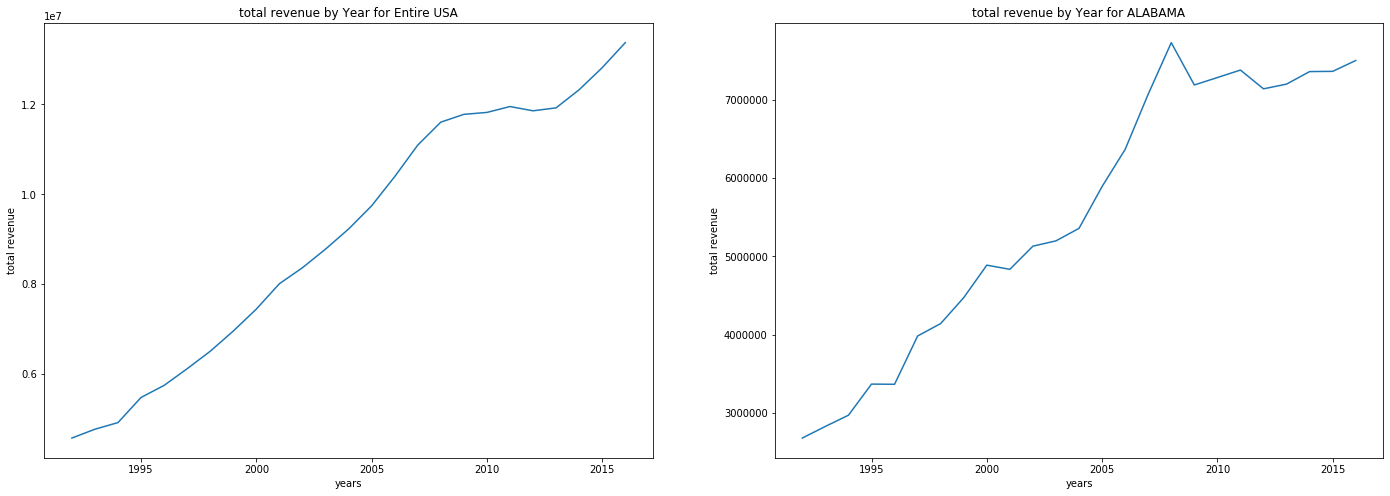

In [27]:
dpl = df

enroll = dpl.loc[dpl['TOTAL_REVENUE'].isnull() == False].groupby('YEAR').mean()[['TOTAL_REVENUE']]

plt.figure(figsize=[24,8])
plt.subplot(121)
plt.plot(enroll.index,enroll.values)
plt.title('total revenue by Year for Entire USA')
plt.xlabel('years')
plt.ylabel('total revenue')

enrollAL = dpl.loc[dpl['TOTAL_REVENUE'].isnull() == False].loc[dpl['STATE']=='ALABAMA'].groupby('YEAR').mean()[['TOTAL_REVENUE']]

plt.subplot(122)
plt.title('total revenue by Year for ALABAMA')
plt.xlabel('years')
plt.ylabel('total revenue')
plt.plot(enrollAL.index,enrollAL.values)
plt.show()